# Detection

In [17]:
!pip install -r "requirements.txt"

  Using cached attrs-21.2.0-py2.py3-none-any.whl (53 kB)
  Using cached certifi-2021.5.30-py2.py3-none-any.whl (145 kB)
  Using cached debugpy-1.3.0-cp38-cp38-win_amd64.whl (4.4 MB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached import_ipynb-0.1.3-py3-none-any.whl
  Using cached ipykernel-6.0.0-py3-none-any.whl (122 kB)
  Using cached ipython-7.25.0-py3-none-any.whl (786 kB)
  Using cached jedi-0.18.0-py2.py3-none-any.whl (1.4 MB)
  Using cached Jinja2-3.0.1-py3-none-any.whl (133 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached MarkupSafe-2.0.1-cp38-cp38-win_amd64.whl (14 kB)
  Using cached matplotlib-3.4.2-cp38-cp38-win_amd64.whl (7.1 MB)
  Using cached matplotlib_inline-0.1.2-p

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\pywin32_system32\\pywintypes38.dll'
Consider using the `--user` option or check the permissions.




  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached terminado-0.10.1-py3-none-any.whl (14 kB)
  Using cached testpath-0.5.0-py3-none-any.whl (84 kB)
  Using cached tifffile-2021.7.2-py3-none-any.whl (169 kB)
  Using cached Werkzeug-2.0.1-py3-none-any.whl (288 kB)
  Attempting uninstall: pywin32
    Found existing installation: pywin32 227
    Uninstalling pywin32-227:
      Successfully uninstalled pywin32-227
  Rolling back uninstall of pywin32
  Moving to c:\users\hp\anaconda3\lib\site-packages\__pycache__\pythoncom.cpython-38.pyc
   from C:\Users\HP\AppData\Local\Temp\pip-uninstall-qv49l81m\pythoncom.cpython-38.pyc
  Moving to c:\users\hp\anaconda3\lib\site-packages\adodbapi
   from C:\Users\HP\anaconda3\Lib\site-packages\~dodbapi
  Moving to c:\users\hp\anaconda3\lib\site-packages\isapi
   from C:\Users\HP\anaconda3\Lib\site-packages\~sapi
  Moving to c:\users\hp\anaconda3\lib\sit

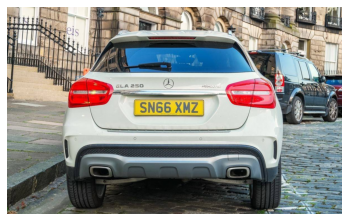

In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

def find_contours(dimensions, img) :
    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        #detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        #checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            #extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)

#             Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) #List that stores the character's binary image (unsorted)
            
    #Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    #arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res




def detect(img):
    plt.imshow(plt.imread(img))
    img = cv2.imread(img)
    img = cv2.resize(img, (640,480))
    plt.axis("off")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)

    contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    if location is None:
        detected = 0
        print ("No contour detected")
    else:
        detected = 1

    if detected == 1:
        cv2.drawContours(img, [location], -1, (0, 0, 255), 3)
        mask = np.zeros(gray.shape, np.uint8)
        new_image = cv2.drawContours(mask, [location], 0,255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        (x,y) = np.where(mask==255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))
        cropped_image = gray[x1:x2+1, y1:y2+1]
        
        cv2.imwrite('car_plate.jpg', cropped_image)
        img = cv2.imread('car_plate.png')
        
imgSource = "car_1.jpg"
detect(f"cars/{imgSource}")

(-0.5, 135.5, 39.5, -0.5)

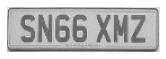

In [2]:
img = cv2.imread("car_plate.jpg")
plt.subplot(1, 2, 2)
plt.imshow(img , cmap='gray')
plt.axis("off")

# Segmentation

In [3]:
def segment_characters(image) :
    img_lp = cv2.resize(image, (300, 100))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]
    img2 = np.float32(img_binary_lp)
    k=20
    attempts=1000
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center = cv2.kmeans(img2,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img_binary_lp.shape))
    # cv2.imwrite("segmented_new.jpg",res2)

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]

    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list



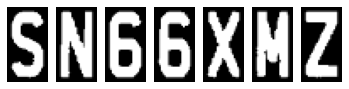

In [4]:
char = segment_characters(img)
for i in range(len(char)):
    plt.subplot(1, len(char), i+1)
    plt.imshow(char[i], cmap='gray')
    nm = imgSource + str(i)
    plt.axis('off')

# Model for characters

In [12]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.executing_eagerly()

True

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory(
        'mod_data/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='categorical')#since we have moore classes

validation_generator = train_datagen.flow_from_directory(
        'mod_data/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28        batch_size=1,
        class_mode='categorical')


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'mod_data/train'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras import optimizers

from tensorflow.keras.callbacks import TensorBoard

In [ ]:
model = Sequential()
model.add(Conv2D(32, (24,24), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00001), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
class stop_training_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') is not None and logs.get('acc') > 0.992) :
            self.model.stop_training = True

In [7]:
batch_size = 1
#callbacks = [tensorboard_callbacks, stop_training_callback()]
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 80)
#, callbacks=callbacks

NameError: name 'model' is not defined

In [8]:
model.save("my_h5_model.h5")

NameError: name 'model' is not defined

In [ ]:
# serialize to JSON
json_file = model.to_json()
with open("./trained_model", "w") as file:
    file.write(json_file)
# serialize weights to HDF5
model.save_weights("my_h5_model.h5")

# Loading Trained Model

In [9]:
from tensorflow.keras.models import model_from_json
# load json and create model
file = open("trained_model/new_edited_model_JSON.json", 'r')
model_json = file.read()
file.close()
loaded_model = model_from_json(model_json)
# load weights
loaded_model.load_weights("trained_model/new_edited_model.h5")

In [10]:
print(loaded_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        55328     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        409632    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        409632    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               8

# Prediction

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
SN66XMZ


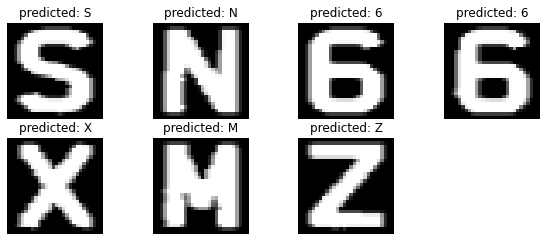

In [11]:
def fix_dimension(img): 
    new_img = np.zeros((28,28,3))
    for i in range(3):
        new_img[:,:,i] = img
    return new_img
  
def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c
        

    output = []
    for i,ch in enumerate(char): #iterating over the characters
        img_ = cv2.resize(ch, (28,28))
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        y_ = loaded_model.predict_classes(img)[0] #predicting the class
        character = dic[y_] #
        output.append(character) #storing the result in a list
        
    plate_number = ''.join(output)
    
    return plate_number

print(show_results())

plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28))
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results()[i]}')
    plt.axis('off')
plt.show()

# END